In [10]:
import numpy as np
import matplotlib.pyplot as plt

from igraph import *
from util import load

In [11]:
authors_in = load('data2/authors_in_freq_v3.json')
authors_div_in = load('data2/authors_in_div_v3.json')
authors_div_out = load('data2/authors_out_div_v3.json')

In [39]:
def plt_div(authors_in, authors_div_in, N1, N2, title):
    average_div_in1 = []
    std_div_in1 = []
    average_div_in2 = []
    std_div_in2 = []
    years = np.arange(1995, 2011)
    for year in years:
        year = str(year)
        authors = []
        cits = []
        for author,cit in authors_in.items():
            if year in cit:
                authors.append(author)
                cits.append(cit[year])
        authors = np.asarray(authors)

        cits_arg_sorted = np.argsort(cits)
        topN1_args = cits_arg_sorted[-N1:]
        topN1_authors = authors[topN1_args]

        topN2_args = cits_arg_sorted[-N2:]
        topN2_authors = authors[topN2_args]

        topN_div_in1 = []
        for author in topN1_authors:
            if author in authors_div_in:
                if year in authors_div_in[author]:
                    div_in = authors_div_in[author][year]
                    topN_div_in1.append(div_in)

        average_div_in1.append(mean(topN_div_in1))
        std_div_in1.append(np.std(topN_div_in1))

        topN_div_in2 = []
        for author in topN2_authors:
            if author in authors_div_in:
                if year in authors_div_in[author]:
                    div_in = authors_div_in[author][year]
                    topN_div_in2.append(div_in)

        average_div_in2.append(mean(topN_div_in2))
        std_div_in2.append(np.std(topN_div_in2))

    plt.figure(figsize=(12,3))
    plt.errorbar(years, average_div_in1, marker='o', yerr=std_div_in1, label='top '+str(N1), alpha=0.7)
    plt.errorbar(years, average_div_in2, marker='o', yerr=std_div_in2, label='top '+str(N2), alpha=0.7)
    plt.ylabel('diversity', fontsize=14)
    plt.xlabel('year', fontsize=14)
    plt.legend(prop={'size':14})
    plt.tick_params(labelsize=13)
    plt.tight_layout()
    plt.savefig('top_%d_%d_div_%s.pdf' % (N1, N2, title))

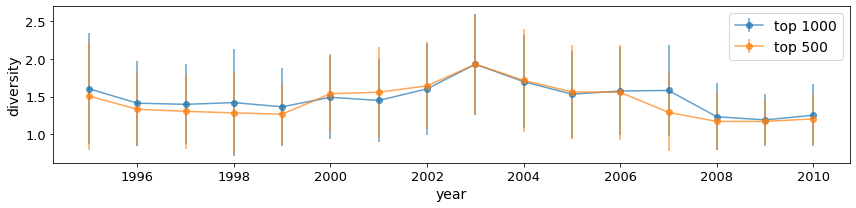

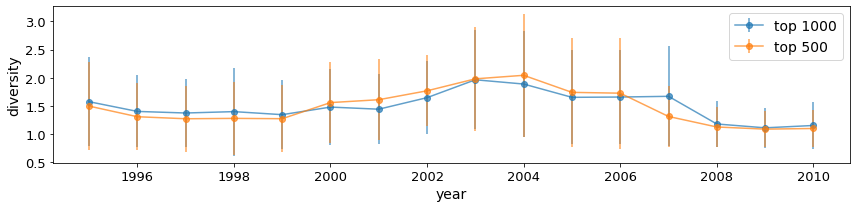

In [40]:
plt_div(authors_in, authors_div_in, 1000, 500, 'in')
plt_div(authors_in, authors_div_out, 1000, 500, 'out')
